# 추천 시스템

추천 시스템은 아이템은 매우 많고 유저의 취향은 다양할 때 **유저가 소비할만한 아이템을 예측하는 모델**입니다. 

http://www.kocca.kr/insight/vol05/vol05_04.pdf

**협업 필터링**은 다수의 사용자의 `아이템 구매 이력 정보`만으로 `사용자간 유사성 및 아이템 간 유사성`을 파악하지만,

**콘텐츠 기반 필터링**은 `아이템의 고유의 정보`를 바탕으로 `아이템 간 유사성`을 파악합니다.

다시 말해, 협업 필터링에서는 **아이템과 사용자 간의 행동 또는 관계에만 주목**할 뿐 아이템 자체의 고유한 속성에 주목하지 않습니다.

콘텐츠 기반 필터링에서는 **아이템 자체의 속성**에만 주목하고 **사용자와 아이템 간의 관련성**에는 주목하지 않습니다.

#### 협업 필터링의 제약
1. 시스템이 충분한 정보를 모으지 못한 사용자나 아이템에 대한 추론을 할 수 없는 상태인 콜드 스타트(Cold Start) 상황
2. 계산량이 너무 많아 추천의 효율이 떨어지는 상황
3. 롱테일의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황

### 데이터 준비
멜론 데이터: https://arena.kakao.com/c/7

스포티파이 데이터: http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html  


위 데이터에 컬럼명이 포함되어 있지 않으므로, 컬럼명을 지정해줍니다. 

In [1]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
# 검색을 쉽게하기 위해 아티스트 문자열을 소문자로 바꿔줍시다.
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [4]:
# 첫 번째 유저가 어떤 아티스트의 노래를 듣는지 확인
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


### 데이터 탐색
- 유저수, 아티스트수, 인기 많은 아티스트
- 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
- 유저 play 횟수 중앙값에 대한 통계

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

### 모델 검증을 위한 사용자 초기 정보 세팅
유튜브 뮤직처럼 처음 입력하는 아티스트 정보 5개 이상 입력받는 과정

In [10]:
# 본인이 좋아하는 아티스트 데이터
my_favorite = ['ed sheeran' , 'maroon5' ,'jason mraz' ,'coldplay' ,'justin bieber']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['hoseong']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['hoseong']})['user_id'].any():  # user_id에 'hoseong'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,hoseong,ed sheeran,30
1,hoseong,maroon5,30
2,hoseong,jason mraz,30
3,hoseong,coldplay,30
4,hoseong,justin bieber,30


### 전처리
관리하기 쉽게 user와 artist 각각에 indexing 해줍니다.  
이런 작업은 추천시스템, 자연어처리에서 자주 하는 작업들입니다. 

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['hoseong'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['ed sheeran'])


358868
157993


In [13]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data


user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,157993,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


### 사용자의 명시적/암묵적 평가
만약 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내면 좋지만  
여기서는 사용자가 아티스트의 곡을 몇 번 플레이했는지 뿐인 암묵적인 선호도입니다.  
https://orill.tistory.com/entry/Explicit-vs-Implicit-Feedback-Datasets?category=1066301

In [14]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


1. 한 번이라도 들었으면 선호한다고 판단
2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단

### Matrix Factorization(MF)
MF 모델은 큰 평가행렬 R을 두 개의 Feature Matrix P와 Q로 분해하는 모델입니다.  
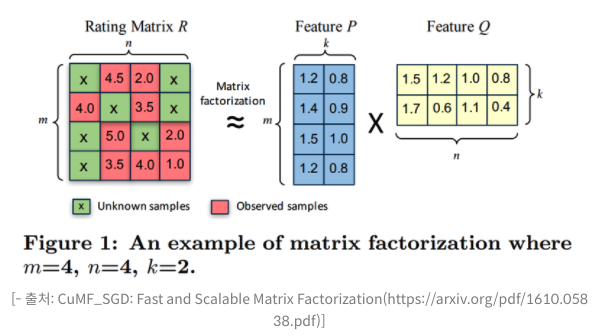
MF 모델 중 사용할 모델은 Collaborative Filtering for Implicit Feedback Datasets 논문에서 제안한 모델입니다.  
http://yifanhu.net/PUB/cf.pdf  

이 모델의 경우 이전 스텝에서 제가 'ed sheeran'을 play했다는 데이터를 추가했기 때문에 저의 벡터와 ed sheeran의 벡터를 곱했을 때 1에 가까워야 모델이 잘 학습하는 것을 목표로 합니다.

### CSR(Compressed Sparse Row) Matrix
Sparse Matrix 메모리 낭비를 최소화하기 위해서는 유저가 들어본 아티스트에 대해서만 정보만을 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요합니다.  

수행할 모델 학습의 input으로 사용할 데이터 타입을 CSR Matrix로 할 것입니다.  

참고 자료  
Scipy sparse matrix handling: https://lovit.github.io/nlp/machine%20learning/2018/04/09/sparse_mtarix_handling/#csr-matrix  
StackOverflow csr_matrix 설명: https://stackoverflow.com/questions/53254104/cant-understand-scipy-sparse-csr-matrix-example/62118005#62118005  
 
csr_matrix 만드는 방법: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

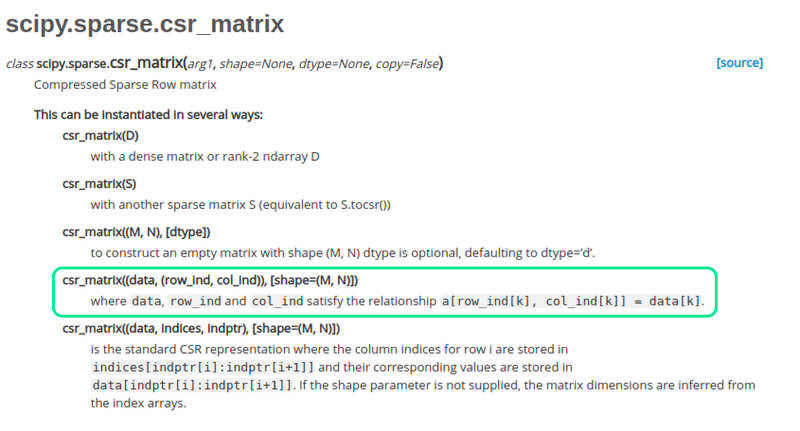

In [15]:
# 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), 
                      shape= (num_user, num_artist))
csr_data


<358869x291347 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Row format>

### MF 모델 학습하기
Matrix Factorization 모델을 implicit 패키지를 사용하여 학습해 봅시다.  
https://github.com/benfred/implicit

- implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지입니다.
- 이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용하겠습니다. Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있습니다.

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [23]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=300, regularization=0.01, use_gpu=False, iterations=100, dtype=np.float32)

'''
1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지 
2. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지 
3. use_gpu : GPU를 사용할 것인지 
4. iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지
'''

'\n1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지 \n2. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지 \n3. use_gpu : GPU를 사용할 것인지 \n4. iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지\n'

In [24]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [25]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
hoseong, coldplay = user_to_idx['hoseong'], artist_to_idx['coldplay']
hoseong_vector, coldplay_vector = als_model.user_factors[hoseong], als_model.item_factors[coldplay]

print('슝=3')

슝=3


In [41]:
hoseong_vector

array([ 1.35773748e-01,  2.52968311e-01,  1.88824341e-01, -2.52710253e-01,
       -3.16293895e-01, -4.74286117e-02, -6.42156661e-01,  1.58565894e-01,
        1.58900782e-01,  5.37603557e-01, -1.45207010e-02,  1.93226293e-01,
        5.09238765e-02, -6.13310002e-02,  4.79451329e-01, -1.35180950e-01,
        6.85815990e-01, -2.86403716e-01, -4.62214589e-01,  5.10825276e-01,
        3.82759750e-01, -9.08218622e-02, -1.18140176e-01, -4.67619002e-01,
       -1.29164770e-01,  4.17536078e-03, -3.20447236e-01, -5.43095529e-01,
        3.19960803e-01, -4.86658402e-02,  4.52495843e-01,  1.41006857e-01,
        4.86796588e-01, -8.43995586e-02,  1.36274740e-01,  1.01028383e-01,
       -7.15704501e-01,  2.11569771e-01,  9.87150595e-02,  9.33867320e-02,
        7.46409446e-02,  2.49910057e-01, -2.74863064e-01, -5.74066602e-02,
       -5.59975624e-01,  5.55693284e-02,  4.06058252e-01, -4.61092830e-01,
        1.01259731e-01,  2.65618116e-01, -2.97062337e-01,  8.53314176e-02,
       -3.21902543e-01, -

In [42]:
coldplay_vector

array([-2.37686816e-03,  2.18241978e-02,  1.13518983e-02, -9.58751049e-03,
        1.49209863e-02,  9.16665886e-03, -1.10722100e-02,  2.39484990e-03,
        3.56378779e-03,  1.61955953e-02, -1.17754180e-03,  4.02836129e-04,
        3.19522806e-03,  1.45529266e-02,  1.76569354e-02,  3.03546302e-02,
        1.85321216e-02,  2.43052794e-03, -5.09342551e-03,  2.21879501e-02,
        6.99029816e-03, -3.42451595e-03, -1.81972533e-02, -1.81213971e-02,
       -1.91321131e-03,  6.82870857e-04, -9.78378952e-03, -1.75752360e-02,
        1.39604481e-02,  1.23707643e-02,  4.08358201e-02,  7.50579499e-03,
        2.53798496e-02,  7.99798686e-03,  5.83663629e-03,  6.43403549e-03,
       -7.00688269e-03,  1.85824595e-02,  8.87679344e-04,  3.22812516e-03,
        6.80777477e-03,  1.40034975e-02,  1.98913133e-03,  1.15386695e-02,
       -1.51816001e-02,  1.31194629e-02,  1.51736559e-02, -2.08348148e-02,
        5.58630051e-03,  2.93297996e-03, -5.29684965e-03,  1.96219585e-03,
        7.64217274e-03, -

In [43]:
# hoseong과 ed_sheeran을 내적하는 코드
np.dot(hoseong_vector, coldplay_vector)

0.83667594

1이 나와야 할텐데 한참 낮은 수치가 나왔습니다.  
factors를 늘리거나 iterations를 늘려야 할 것 같습니다.

In [44]:
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(hoseong_vector, queen_vector)

0.0357047

## 비슷한 아티스트 찾기 + 유저에게  추천하기

### 비슷한 아티스트 찾기
AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 아티스트를 찾습니다.  
처음으로는 제가 좋아하는 coldplay로 찾아보겠습니다.

In [31]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0),
 (30694, 0.4291328),
 (56465, 0.42707172),
 (51260, 0.4266989),
 (37997, 0.42618954),
 (93810, 0.42608854),
 (26598, 0.4244941),
 (14799, 0.42390677),
 (38514, 0.42310765),
 (97824, 0.42305118),
 (57592, 0.42298052),
 (37742, 0.4227517),
 (18468, 0.42243344),
 (31068, 0.4221587),
 (70749, 0.42117304)]

In [32]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'isolation',
 'sect',
 'furze',
 'dimhymn',
 'lik',
 'hell militia',
 'trist',
 'circle of ouroborus',
 'bergraven',
 'haemoth',
 'obscurus advocam',
 'vrolok',
 'ondskapt',
 'accidental kenny & the tourist-tones']

In [33]:
# 몇 번 더 반복해서 확인하기 위해 위의 코드를 함수로 만듭니다.
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

print("슝=3")

슝=3


In [34]:
get_similar_artist('2pac')

['2pac',
 'notorious b.i.g.',
 'dr. dre',
 'ice cube',
 'dmx',
 'the game',
 'snoop dogg',
 'nas',
 '50 cent',
 'bone thugs-n-harmony']

힙합의 경우 매니아가 많아서 더 잘 추천됩니다.  
매니아들은 다른 장르의 아티스트들과는 섷노도가 낮게 나타나기 때문입니다.  

In [35]:
get_similar_artist('lady gaga')

['lady gaga',
 'katy perry',
 'the pussycat dolls',
 'britney spears',
 'guru josh project',
 'beyoncé',
 'flo rida',
 'rihanna',
 'discobitch',
 'kid cudi vs. crookers']

여자 아티스트들이 추천되고 있습니다.

### 유저에게 아티스트 추천하기
AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다.  
filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [36]:
user = user_to_idx['hoseong']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(35, 0.3350687),
 (24, 0.29045674),
 (217, 0.25395936),
 (490, 0.24849264),
 (28, 0.24247995),
 (277, 0.24189836),
 (1607, 0.19383386),
 (627, 0.1921122),
 (509, 0.18952669),
 (399, 0.18223996),
 (418, 0.18011557),
 (2103, 0.17642052),
 (503, 0.14847413),
 (352, 0.14846681),
 (2902, 0.14815077),
 (5, 0.14488849),
 (3758, 0.14387119),
 (637, 0.14169292),
 (2228, 0.14140417),
 (376, 0.13784063)]

In [37]:
[idx_to_artist[i[0]] for i in artist_recommended]

['john mayer',
 'jack johnson',
 'radiohead',
 'oasis',
 'the killers',
 'muse',
 'james morrison',
 'maroon 5',
 'keane',
 'colbie caillat',
 'u2',
 'the fray',
 'green day',
 'linkin park',
 'james blunt',
 'red hot chili peppers',
 'gavin degraw',
 'akon',
 'adele',
 'black eyed peas']

AlternatingLeastSquares 클래스에 구현된 explain 메소드를 사용하면 제가 기록을 남긴 데이터 중 이 추천에 기여한 정도를 확인할 수 있습니다.

In [38]:
muse = artist_to_idx['muse']
explain = als_model.explain(user, csr_data, itemid=muse)

In [39]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('coldplay', 0.22071750942589433),
 ('justin bieber', 0.015373445134104304),
 ('jason mraz', 0.013557282426245485),
 ('maroon5', -0.0020508774239295985),
 ('ed sheeran', -0.006603027793398244)]

muse가 추천된 데에는 coldplay가 가장 크게 기여했습니다. 

filter_already_liked_items=True로 했는데 앞에 maroon 5는 제가 이미 평가한 아이템이 나오고 있습니다. 이것은 implicit 버전 0.4.2에서 생긴 버그입니다. 코드는 사람이 만들기 때문에 이렇게 실수할 가능성이 있습니다.  
오픈 소스 생태계에서는 누구든 이런 문제점을 지적하고 Pull Request를 통하여 수정을 제안할 수 있습니다.  
https://github.com/benfred/implicit/issues/365  
https://github.com/benfred/implicit/pull/389  

많이들 사용하는 Tensorflow나 numpy, pandas도 여러 작은 버그들이 있습니다. 이런 유명한 패키지의 오류를 고쳐서 Pull Request를 하여 Contribute 한다면 좋은 이력이 되기도 합니다.

모델이 추천한 20개 중 몇 개를 실제로 선호하는지 계산하여 모델의 객관적인 지표를 만들 수 있을 것 같습니다.  
https://danthetech.netlify.app/DataScience/evaluation-metrics-for-recommendation-system

### 아쉬운 점
1. 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않습니다. 연령대별로 음악 취향이 굉장히 다르지 않을까요? 
2. 유저가 언제 play 했는지에 반영하기 쉽지 않습니다. 